# 1. TF-IDF原理

TF-IDF是Term Frequency -  Inverse Document Frequency的缩写，即“词频-逆文本频率”,是一种用于资讯检索和资讯探勘的常用加权技术。它由两部分组成，TF和IDF。

TF也就是词频，IDF就是逆文本率，IDF就是来帮助我们来反应这个词的重要性的，进而修正仅仅用词频表示的词特征值。

概括来讲， IDF反应了一个词在所有文本中出现的频率，如果一个词在很多的文本中出现，那么它的IDF值应该低，比如上文中的“to”。而反过来如果一个词在比较少的文本中出现，那么它的IDF值应该高。比如一些专业的名词如“Machine Learning”。这样的词IDF值应该高。一个极端的情况，如果一个词在所有的文本中都出现，那么它的IDF值应该为0。

一个词x的IDF的基本公式如下：

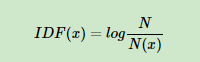

其中，N代表语料库中文本的总数，而N(x)代表语料库中包含词x的文本总数。

但是在一些特殊的情况会有一些小问题，比如某一个生僻词在语料库中没有，这样我们的分母为0， IDF没有意义了。

最常见的IDF平滑后的公式之一为：

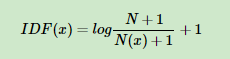

有了IDF的定义，我们就可以计算某一个词的TF-IDF值了：

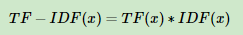

# 2.文本矩阵化

在scikit-learn中，有两种方法进行TF-IDF的预处理。

第一种方法是在用CountVectorizer类向量化之后再调用TfidfTransformer类进行预处理。

In [1]:
from sklearn.feature_extraction.text import TfidfTransformer  
from sklearn.feature_extraction.text import CountVectorizer  

corpus=["I come to China to travel", 
    "This is a car polupar in China",          
    "I love tea and Apple ",   
    "The work is to write some papers in science"] 

vectorizer=CountVectorizer()

transformer = TfidfTransformer()
tfidf = transformer.fit_transform(vectorizer.fit_transform(corpus))  
print(tfidf)

  (0, 4)	0.4424621378947393
  (0, 15)	0.697684463383976
  (0, 3)	0.348842231691988
  (0, 16)	0.4424621378947393
  (1, 3)	0.3574550433419527
  (1, 14)	0.45338639737285463
  (1, 6)	0.3574550433419527
  (1, 2)	0.45338639737285463
  (1, 9)	0.45338639737285463
  (1, 5)	0.3574550433419527
  (2, 7)	0.5
  (2, 12)	0.5
  (2, 0)	0.5
  (2, 1)	0.5
  (3, 15)	0.2811316284405006
  (3, 6)	0.2811316284405006
  (3, 5)	0.2811316284405006
  (3, 13)	0.3565798233381452
  (3, 17)	0.3565798233381452
  (3, 18)	0.3565798233381452
  (3, 11)	0.3565798233381452
  (3, 8)	0.3565798233381452
  (3, 10)	0.3565798233381452


第二种方法是直接用TfidfVectorizer完成向量化与TF-IDF预处理。

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf2 = TfidfVectorizer()
re = tfidf2.fit_transform(corpus)
print(re)

  (0, 4)	0.4424621378947393
  (0, 15)	0.697684463383976
  (0, 3)	0.348842231691988
  (0, 16)	0.4424621378947393
  (1, 3)	0.3574550433419527
  (1, 14)	0.45338639737285463
  (1, 6)	0.3574550433419527
  (1, 2)	0.45338639737285463
  (1, 9)	0.45338639737285463
  (1, 5)	0.3574550433419527
  (2, 7)	0.5
  (2, 12)	0.5
  (2, 0)	0.5
  (2, 1)	0.5
  (3, 15)	0.2811316284405006
  (3, 6)	0.2811316284405006
  (3, 5)	0.2811316284405006
  (3, 13)	0.3565798233381452
  (3, 17)	0.3565798233381452
  (3, 18)	0.3565798233381452
  (3, 11)	0.3565798233381452
  (3, 8)	0.3565798233381452
  (3, 10)	0.3565798233381452


# 3.互信息的原理

# 3.1互信息

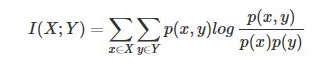

其衡量的是两个随机变量之间的相关性，即一个随机变量中包含的关于另一个随机变量的信息量。

即互信息其实就是对X和Y的所有可能的取值情况的点互信息PMI的加权和。

# 3.2点互信息

点互信息PMI其实就是从信息论里面的互信息这个概念里面衍生出来的。

点互信息PMI(Pointwise Mutual Information)这个指标常常用来衡量两个事物之间的相关性（比如两个词）。公式如下：

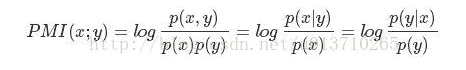

# 3.3 互信息API

In [ ]:
from sklearn import metrics as mr
mr.mutual_info_score(label,x)

In [10]:

from sklearn import datasets
from sklearn.feature_selection import mutual_info_classif
 
iris = datasets.load_iris()
x = iris.data
print(x)
label = iris.target
 
mutual_info = mutual_info_classif(x, label, discrete_features= False)
print(mutual_info)


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

尝试了使用任务2的数据集，最后没调出来，一直训练没有出结果，原因在查找中。。。。。